Leitura do arquivo e pre-processamento dos dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#caminho_arquivo = "./Bitcoin_2024_historical_data_coinmarketcap.csv"
caminho_arquivo = "./arquivo_combinado.csv"

df = pd.read_csv(caminho_arquivo, sep=";", encoding="utf-8", header=0)

display(df.head())


df.info()
# Verifica se há valores nulos
display(df.isnull().sum(axis=0))

,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp
0,2025-01-01T00:00:00.000Z,2025-01-01T23:59:59.999Z,2025-01-01T21:25:00.000Z,2025-01-01T09:28:00.000Z,2781,93425.102136,94929.864809,92788.127885,94419.757505,2.451989e+10,1.869850e+12,2025-01-01T23:59:59.999Z
1,2024-12-31T00:00:00.000Z,2024-12-31T23:59:59.999Z,2024-12-31T14:35:00.000Z,2024-12-31T01:32:00.000Z,2781,92643.251222,96090.603788,91914.027783,93429.202811,4.362511e+10,1.850183e+12,2024-12-31T23:59:59.999Z
2,2024-12-30T00:00:00.000Z,2024-12-30T23:59:59.999Z,2024-12-30T20:25:00.000Z,2024-12-30T15:11:00.000Z,2781,93527.197497,94903.323896,91317.135460,92643.214604,5.618800e+10,1.834643e+12,2024-12-30T23:59:59.999Z
3,2024-12-29T00:00:00.000Z,2024-12-29T23:59:59.999Z,2024-12-29T00:00:00.000Z,2024-12-29T23:12:00.000Z,2781,95174.055117,95174.878402,92881.791870,93530.228438,2.963589e+10,1.852119e+12,2024-12-29T23:59:59.999Z
4,2024-12-28T00:00:00.000Z,2024-12-28T23:59:59.999Z,2024-12-28T22:53:00.000Z,2024-12-28T01:27:00.000Z,2781,94160.186223,95525.898522,94014.286497,95163.931926,2.410744e+10,1.884684e+12,2024-12-28T23:59:59.999Z


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5286 entries, 0 to 5285
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timeOpen   5286 non-null   object 
 1   timeClose  5286 non-null   object 
 2   timeHigh   5286 non-null   object 
 3   timeLow    5286 non-null   object 
 4   name       5286 non-null   int64  
 5   open       5286 non-null   float64
 6   high       5286 non-null   float64
 7   low        5286 non-null   float64
 8   close      5286 non-null   float64
 9   volume     5286 non-null   float64
 10  marketCap  5286 non-null   float64
 11  timestamp  5286 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 495.7+ KB


timeOpen     0
timeClose    0
timeHigh     0
timeLow      0
name         0
open         0
high         0
low          0
close        0
volume       0
marketCap    0
timestamp    0
dtype: int64

In [3]:
# Exclui as colunas timeOpen e timeClose e name
df.drop(columns=['timeOpen', 'timeClose', 'timeHigh', 'timeLow','name'], inplace=True)

display(df.head())

,open,high,low,close,volume,marketCap,timestamp
0,93425.102136,94929.864809,92788.127885,94419.757505,2.451989e+10,1.869850e+12,2025-01-01T23:59:59.999Z
1,92643.251222,96090.603788,91914.027783,93429.202811,4.362511e+10,1.850183e+12,2024-12-31T23:59:59.999Z
2,93527.197497,94903.323896,91317.135460,92643.214604,5.618800e+10,1.834643e+12,2024-12-30T23:59:59.999Z
3,95174.055117,95174.878402,92881.791870,93530.228438,2.963589e+10,1.852119e+12,2024-12-29T23:59:59.999Z
4,94160.186223,95525.898522,94014.286497,95163.931926,2.410744e+10,1.884684e+12,2024-12-28T23:59:59.999Z


In [4]:
# Converte a coluna timestamp de datetime para date
df["timestamp"] = pd.to_datetime(df["timestamp"]).dt.date

display(df.head())

,open,high,low,close,volume,marketCap,timestamp
0,93425.102136,94929.864809,92788.127885,94419.757505,2.451989e+10,1.869850e+12,2025-01-01
1,92643.251222,96090.603788,91914.027783,93429.202811,4.362511e+10,1.850183e+12,2024-12-31
2,93527.197497,94903.323896,91317.135460,92643.214604,5.618800e+10,1.834643e+12,2024-12-30
3,95174.055117,95174.878402,92881.791870,93530.228438,2.963589e+10,1.852119e+12,2024-12-29
4,94160.186223,95525.898522,94014.286497,95163.931926,2.410744e+10,1.884684e+12,2024-12-28


In [5]:
# Move a coluna timestamp para o início do dataframe
cols = ['timestamp'] + [col for col in df.columns if col != 'timestamp']
df = df[cols]

display(df.head())

df.info()

,timestamp,open,high,low,close,volume,marketCap
0,2025-01-01,93425.102136,94929.864809,92788.127885,94419.757505,2.451989e+10,1.869850e+12
1,2024-12-31,92643.251222,96090.603788,91914.027783,93429.202811,4.362511e+10,1.850183e+12
2,2024-12-30,93527.197497,94903.323896,91317.135460,92643.214604,5.618800e+10,1.834643e+12
3,2024-12-29,95174.055117,95174.878402,92881.791870,93530.228438,2.963589e+10,1.852119e+12
4,2024-12-28,94160.186223,95525.898522,94014.286497,95163.931926,2.410744e+10,1.884684e+12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5286 entries, 0 to 5285
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  5286 non-null   object 
 1   open       5286 non-null   float64
 2   high       5286 non-null   float64
 3   low        5286 non-null   float64
 4   close      5286 non-null   float64
 5   volume     5286 non-null   float64
 6   marketCap  5286 non-null   float64
dtypes: float64(6), object(1)
memory usage: 289.2+ KB


#### Seta o timestamp como índice  -- de data do intervalo diario e ordena o dataframe por data   

In [6]:
# seta o timestamp como índice  -- de data do intervalo diario e ordena o dataframe por data    
df.set_index('timestamp', inplace=True)
#df.sort_index(inplace=True)

display(df.head())

df.info()

df.index.min(), df.index.max()

,open,high,low,close,volume,marketCap
timestamp,,,,,,
2025-01-01,93425.102136,94929.864809,92788.127885,94419.757505,2.451989e+10,1.869850e+12
2024-12-31,92643.251222,96090.603788,91914.027783,93429.202811,4.362511e+10,1.850183e+12
2024-12-30,93527.197497,94903.323896,91317.135460,92643.214604,5.618800e+10,1.834643e+12
2024-12-29,95174.055117,95174.878402,92881.791870,93530.228438,2.963589e+10,1.852119e+12
2024-12-28,94160.186223,95525.898522,94014.286497,95163.931926,2.410744e+10,1.884684e+12


<class 'pandas.core.frame.DataFrame'>
Index: 5286 entries, 2025-01-01 to 2010-07-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       5286 non-null   float64
 1   high       5286 non-null   float64
 2   low        5286 non-null   float64
 3   close      5286 non-null   float64
 4   volume     5286 non-null   float64
 5   marketCap  5286 non-null   float64
dtypes: float64(6)
memory usage: 289.1+ KB


(datetime.date(2010, 7, 14), datetime.date(2025, 1, 1))

In [7]:
df.isnull().sum(axis=0)

open         0
high         0
low          0
close        0
volume       0
marketCap    0
dtype: int64

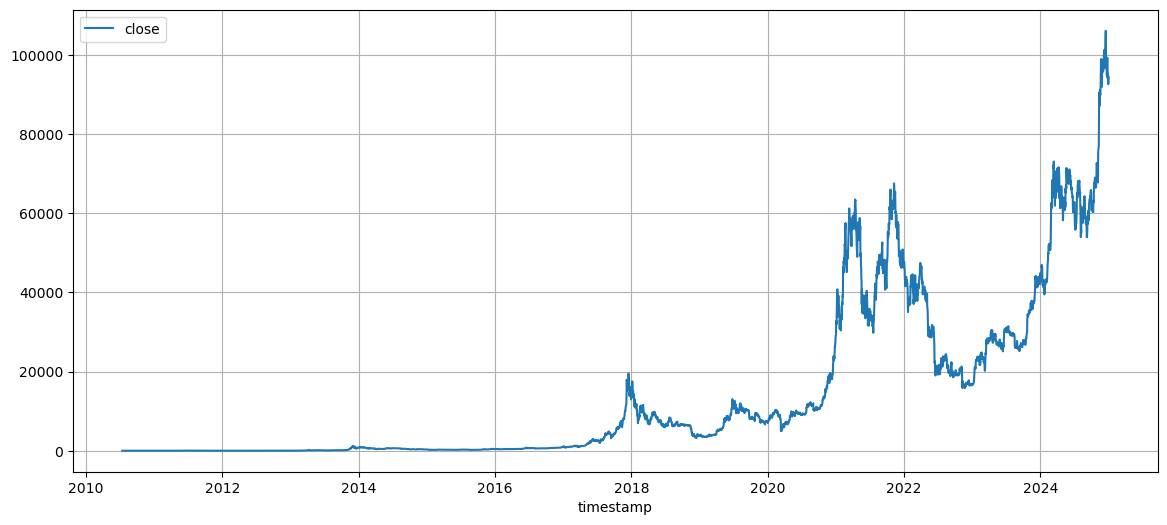

In [8]:
plt.figure(figsize=(14, 6))

#df["open"].plot(label='open')
#df["high"].plot(label='high')
#df["low"].plot(label='low')
df["close"].plot(label='close')
plt.grid(True)
plt.legend()
plt.show()

In [9]:
print(round(df["high"].max(), 2))
print(round(df["low"].min(),  2))
print()
print(round(df["high"].mean(), 2))
print(round(df["low"].mean(),  2))
print()
print(round(df["high"].std(), 2))
print(round(df["low"].std(),  2))



108268.45
0.05

14287.69
13643.9

21090.98
20166.78


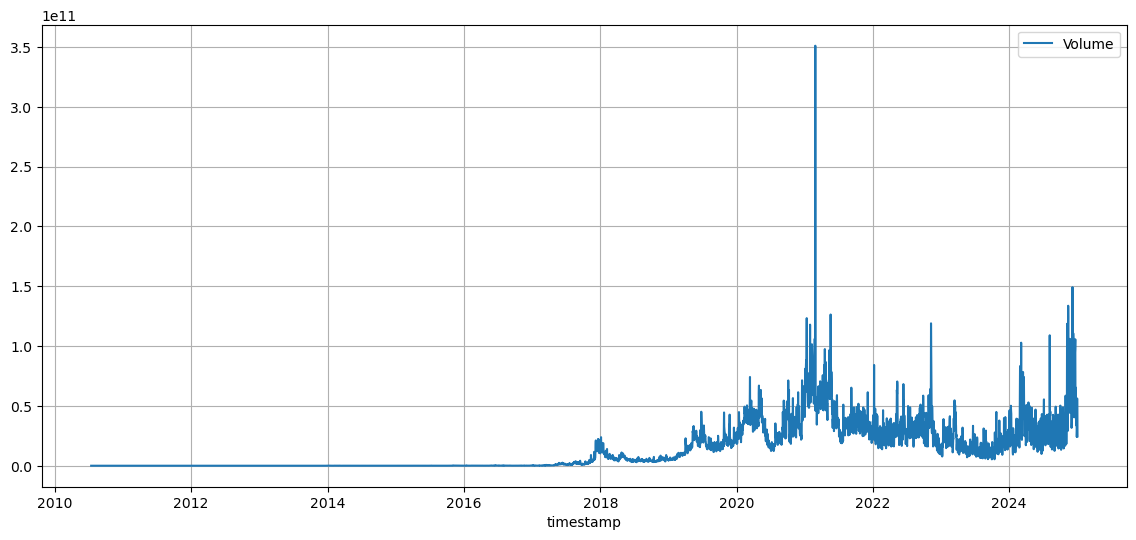

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

df["volume"].plot(label='Volume')
#df["marketCap"].plot(label='Market Cap')

plt.grid(True)
plt.legend()
plt.show()

Funcao: Combina todos os arquivos CSV e gera um só:

In [1]:
import pandas as pd
import os

def combinar_csvs(diretorio_atual, arquivo_saida):
    # Lista todos os arquivos no diretório atual
    arquivos = [f for f in os.listdir(diretorio_atual) if f.endswith('.csv')]
    
    # Lista para armazenar dataframes
    dataframes = []

   # Inverte a ordem dos arquivos para concatenar os registros de ordem decrescente de datas
    arquivos = arquivos[::-1]
    
    # Lê cada arquivo CSV e adiciona ao dataframe
    for arquivo in arquivos:
        caminho_arquivo = os.path.join(diretorio_atual, arquivo)
        df = pd.read_csv(caminho_arquivo, sep=";", encoding="utf-8", header=0) # engine='python')
        dataframes.append(df)
    
    # Concatena todos os dataframes
    df_combinado = pd.concat(dataframes, ignore_index=False) #, axis=0, ignore_index=True)
    
    # Salva o dataframe combinado em um novo arquivo CSV
    df_combinado.to_csv(arquivo_saida, sep=";", index=False)
    
    return df_combinado

# Exemplo de uso
diretorio_atual = os.getcwd()
arquivo_saida   = 'arquivo_combinado.csv'
df_combinado    = combinar_csvs(diretorio_atual, arquivo_saida)

print(f"Arquivo combinado salvo como {arquivo_saida}")
df_combinado.head()

Arquivo combinado salvo como arquivo_combinado.csv


,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp
0,2025-01-01T00:00:00.000Z,2025-01-01T23:59:59.999Z,2025-01-01T21:25:00.000Z,2025-01-01T09:28:00.000Z,2781,93425.102136,94929.864809,92788.127885,94419.757505,2.451989e+10,1.869850e+12,2025-01-01T23:59:59.999Z
1,2024-12-31T00:00:00.000Z,2024-12-31T23:59:59.999Z,2024-12-31T14:35:00.000Z,2024-12-31T01:32:00.000Z,2781,92643.251222,96090.603788,91914.027783,93429.202811,4.362511e+10,1.850183e+12,2024-12-31T23:59:59.999Z
2,2024-12-30T00:00:00.000Z,2024-12-30T23:59:59.999Z,2024-12-30T20:25:00.000Z,2024-12-30T15:11:00.000Z,2781,93527.197497,94903.323896,91317.135460,92643.214604,5.618800e+10,1.834643e+12,2024-12-30T23:59:59.999Z
3,2024-12-29T00:00:00.000Z,2024-12-29T23:59:59.999Z,2024-12-29T00:00:00.000Z,2024-12-29T23:12:00.000Z,2781,95174.055117,95174.878402,92881.791870,93530.228438,2.963589e+10,1.852119e+12,2024-12-29T23:59:59.999Z
4,2024-12-28T00:00:00.000Z,2024-12-28T23:59:59.999Z,2024-12-28T22:53:00.000Z,2024-12-28T01:27:00.000Z,2781,94160.186223,95525.898522,94014.286497,95163.931926,2.410744e+10,1.884684e+12,2024-12-28T23:59:59.999Z


Teste da função ponto a ponto:

In [12]:
import pandas as pd
import os

diretorio_atual

arquivos = [f for f in os.listdir(diretorio_atual) if f.endswith('.csv')]

arquivos

dataframes = []

for arquivo in arquivos:
    caminho_arquivo = os.path.join(diretorio_atual, arquivo)
    df = pd.read_csv(caminho_arquivo, sep=";", encoding="utf-8", header=0) #, index_col=0)
    dataframes.append(df)


#os.path.join(diretorio_atual, arquivo)

df["timestamp"] = pd.to_datetime(df["timestamp"]).dt.date
df["timeOpen"]  = pd.to_datetime(df["timeOpen"]).dt.date
df["timeClose"] = pd.to_datetime(df["timeClose"]).dt.date

#(df.sort_index(axis=0))

caminho_arquivo
arquivo
arquivos = arquivos[::-1]
arquivos

['Bitcoin_2024_historical_data_coinmarketcap.csv',
 'Bitcoin_2023_historical_data_coinmarketcap.csv',
 'Bitcoin_2022_historical_data_coinmarketcap.csv',
 'Bitcoin_2021_historical_data_coinmarketcap.csv',
 'Bitcoin_2020_historical_data_coinmarketcap.csv',
 'Bitcoin_2019_historical_data_coinmarketcap.csv',
 'Bitcoin_2018_historical_data_coinmarketcap.csv',
 'Bitcoin_2017_historical_data_coinmarketcap.csv',
 'Bitcoin_2016_historical_data_coinmarketcap.csv',
 'Bitcoin_2015_historical_data_coinmarketcap.csv',
 'Bitcoin_2014_historical_data_coinmarketcap.csv',
 'Bitcoin_2013_historical_data_coinmarketcap.csv',
 'Bitcoin_2012_historical_data_coinmarketcap.csv',
 'Bitcoin_2011_historical_data_coinmarketcap.csv',
 'Bitcoin_2010_historical_data_coinmarketcap.csv',
 'arquivo_combinado.csv']